통계적 사고 (2판) 연습문제 ([thinkstats2.com](thinkstats2.com), [think-stat.xwmooc.org](http://think-stat.xwmooc.org))<br>
Allen Downey / 이광춘(xwMOOC)

In [ ]:
%matplotlib inline
from __future__ import print_function

import math
import first
import chap07soln
import thinkstats2
import thinkplot
import numpy as np

## 연습문제 7.1

NSFG 에서 나온 데이터를 사용해서, 출생체중과 산모연령 산점도를 그리시오. 출생체중과 산모연령 백분위수를 도식화하시오. 피어슨 상관과 스피어만 상관을 계산하시오. 두 번수 사이 관계를 어떻게 특징적으로 묘사할 수 있을까?

In [ ]:
def ScatterPlot(ages, weights, alpha=1.0):
    """Make a scatter plot and save it.

    ages: sequence of float
    weights: sequence of float
    alpha: float
    """
    thinkplot.Scatter(ages, weights, alpha=alpha)
    thinkplot.Config(xlabel='age (years)',
                     ylabel='weight (lbs)',
                     xlim=[10, 45],
                     ylim=[0, 15],
                     legend=False)

def BinnedPercentiles(df):
    """Bin the data by age and plot percentiles of weight for each bin.

    df: DataFrame
    """
    bins = np.arange(10, 48, 3)
    indices = np.digitize(df.agepreg, bins)
    groups = df.groupby(indices)

    ages = [group.agepreg.mean() for i, group in groups][1:-1]
    cdfs = [thinkstats2.Cdf(group.totalwgt_lb) for i, group in groups][1:-1]

    thinkplot.PrePlot(3)
    for percent in [75, 50, 25]:
        weights = [cdf.Percentile(percent) for cdf in cdfs]
        label = '%dth' % percent
        thinkplot.Plot(ages, weights, label=label)

    thinkplot.Show(xlabel="mother's age (years)",
                   ylabel='birth weight (lbs)')    

1. 두 변수(산모 나이와 출생체중) 사이 약한 관계가 존재하는 것이 산점도에 나와있다.
1. 상관이 이점을 지지한다. 피어슨 상관은 약 0.07, 스피어만 상관은 약 0.09. 상관계수 차이가 나는 것이 이상점에 대한 영향 혹은 비선형 관계를 제시하고 있다.
1. 체중과 산모연령을 백분위수로 도식화하면 관계가 비선형임이 제시된다. 출생체중은 산모나이 15세로부터 25세까지 연령범위에서 좀더 급격하게 증가하고 있다. 그 이후에, 효과는 더 약화된다.

thinkstats2 Corr 0.0688339703541
thinkstats2 SpearmanCorr 0.0946100410966


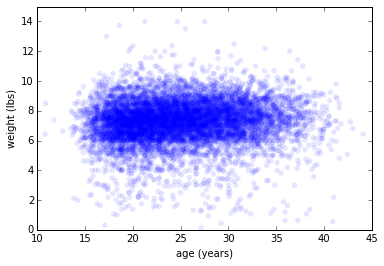

In [7]:
thinkstats2.RandomSeed(17)
    
live, firsts, others = first.MakeFrames()
live = live.dropna(subset=['agepreg', 'totalwgt_lb'])

ages = live.agepreg
weights = live.totalwgt_lb
print('thinkstats2 Corr', thinkstats2.Corr(ages, weights))
print('thinkstats2 SpearmanCorr', thinkstats2.SpearmanCorr(ages, weights))

ScatterPlot(ages, weights, alpha=0.1)

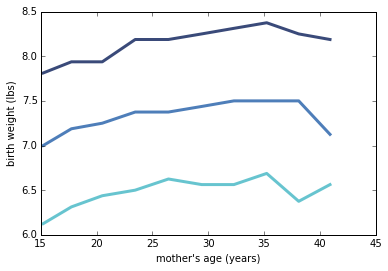

In [6]:
BinnedPercentiles(live)